# Exploratory data analysis on a Haberman Dataset

Objective: Explore the data and find insights in the haberman dataset 

References: Referenced for ways to plot multiple figures in the same script and got the idea of enumerating and implemented on my own
- link: https://www.kaggle.com/gilsousa/habermans-survival-data-set/kernels


In [0]:
# importing all the relevant libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [0]:
# Loading haberman's data from the csv file
data_df = pd.read_csv("/content/haberman.csv")

### About the data from kaggle,
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

In [4]:
data_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
data_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
data_df.shape

(306, 4)

In [7]:
data_df['status'].value_counts()
# data_df['nodes'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation: 
Indicates an imbalanced dataset. Status= 1 has 225 datapoints (73%) i.e. people who lived more than 5 years

In [8]:
data_df.info()
# no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [0]:
# create a column with a label flag for status.

data_df['label'] = data_df['status'].apply(lambda x : "> 5 years" if x ==1 else "< 5 years" )

### Visualizations and plots

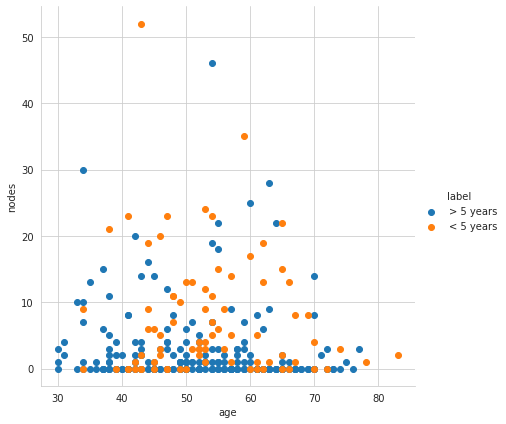

In [11]:
# 2D scatter plot
sns.set_style("whitegrid")
sns.FacetGrid(data_df, hue='label',height = 6).map(plt.scatter,'age','nodes').add_legend()
plt.show()

Observation: Cannot clearly notice any difference between the nodes and age

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


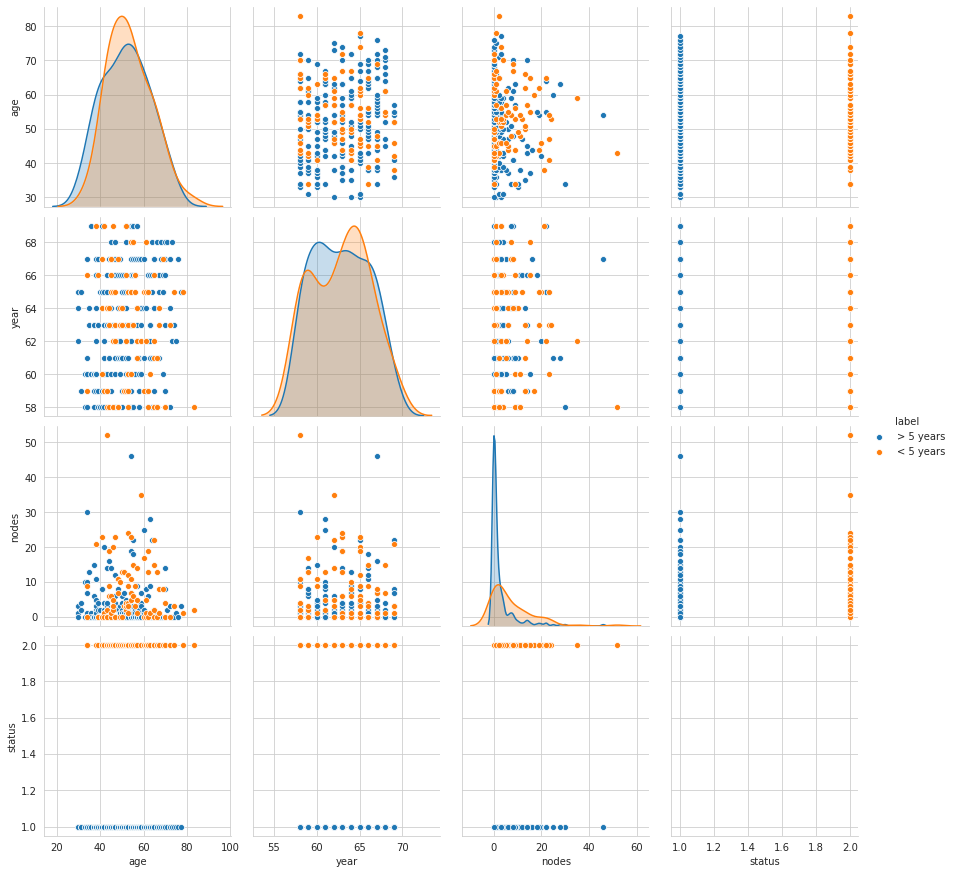

In [12]:
sns.set_style("whitegrid")
sns.pairplot(data_df, hue="label", size =3);
plt.show()

### Probability density functions

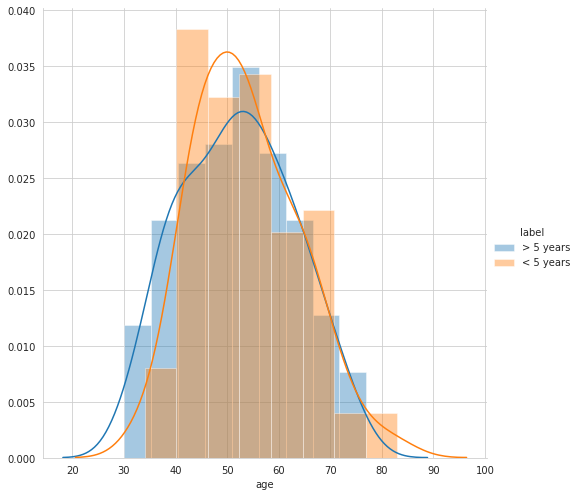

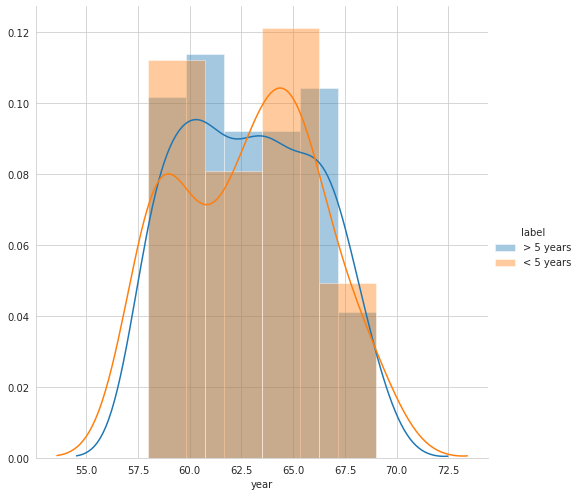

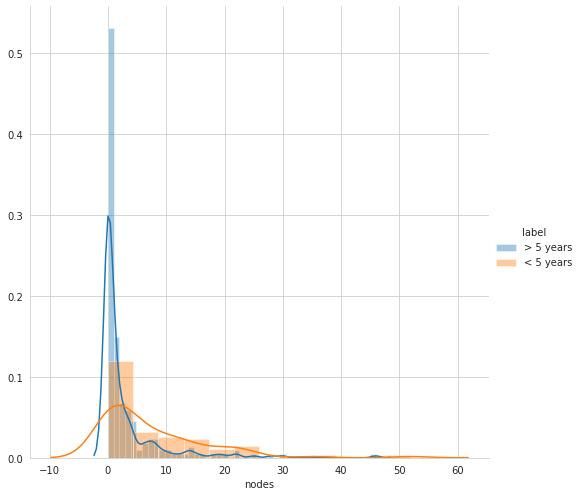

In [13]:

for id, column in enumerate(list(data_df.columns[:-2])):
    sns.FacetGrid(data_df, hue='label', height = 7).map(sns.distplot,column).add_legend()
    plt.show()

Observation: 
- In the the nodes vs labels pdf, the ones who lived for more then 5 years almost had zero or less than zero nodes. Most of the data is concentrated in that region where as the ones who lived less than 5 years is very diverse.
- Other distributions show overlap when it comes to age and year vs label and donot show much insight 

### Cummulative distribution function

age
year
nodes


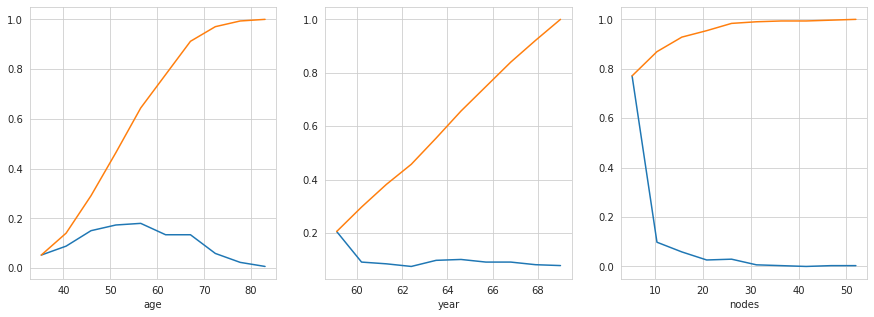

In [33]:
#
plt.figure(figsize=(15,5))
# Converting into differnet sub plots of rows1 and columns 3

for index, column in enumerate(list(data_df.columns[:-2])):
    plt.subplot(1,3,index+1)

    counts, bin_edges = np.histogram(data_df[column], bins=10, 
                                    density = True)
    pdf = counts/(sum(counts))

    #compute CDF
    cdf = np.cumsum(pdf)
    print(column)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(column)

Observation:
- Over 80 percent of the cases were below the age of 63
- Over 85% cases had less than 10 nodes present

### Box plots

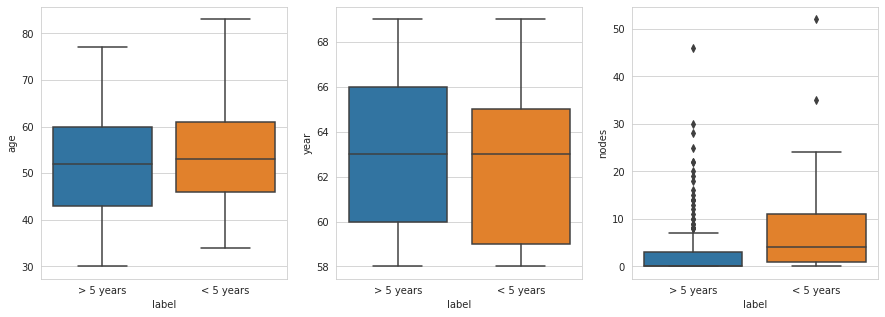

In [45]:
fig, axes = plt.subplots(1,3,figsize= (15,5))
for ind,feature in enumerate(list(data_df.columns[:-2])):
    sns.boxplot(x='label',y= feature, data=data_df, ax = axes[ind])
plt.show()

### Violin Plots

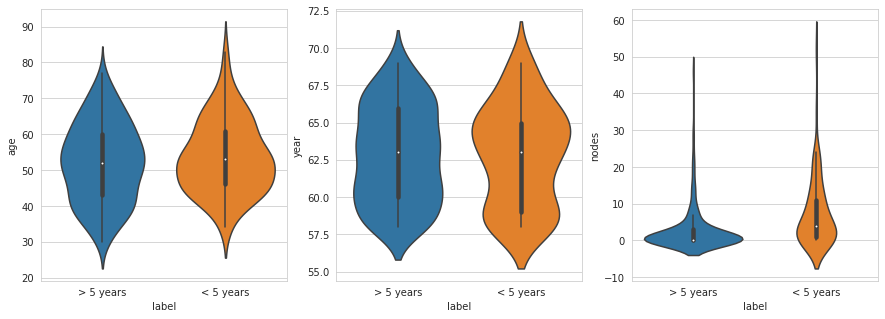

In [46]:
fig, axes = plt.subplots(1,3,figsize= (15,5))
for ind,feature in enumerate(list(data_df.columns[:-2])):
    sns.violinplot(x='label',y= feature, data=data_df, ax = axes[ind])
plt.show()

Observations:
- Age vs labels: It appears that age distributions seems to be similar and median begin around 50-55 years for people who lived > 5 yrs and died < 5yrs
- Year vs labels: Years operated shows that a greater concentration of  people who died within 5 years were operated before 1963, but this could be even due to imbalnce of data with just 27 percent of the data having < 5 years data points
- Nodes vs labels: Almost 75th quartile of the data (> 5 years) has less tha 3-4 nodes 

###2D density plots

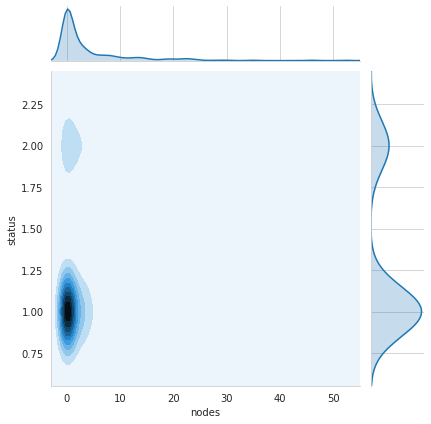

In [60]:
sns.jointplot(x="nodes", y= "status", data=data_df, kind="kde")
plt.show()



Observation: We can notice a lot of concentration/density present where the nodes are almost zero lived for more than 5 years

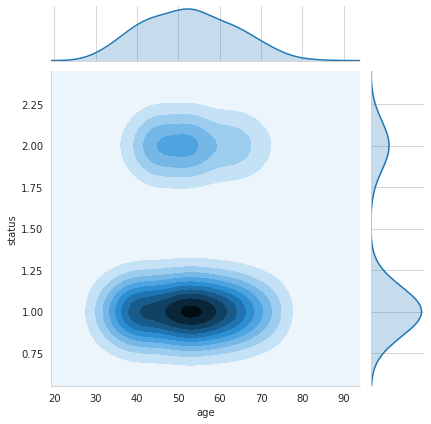

In [61]:
sns.jointplot(x="age", y= "status", data=data_df, kind="kde")
plt.show()


Observation: A huge Concentration of ages between 50-60 were seen to be alive for more than 5 years

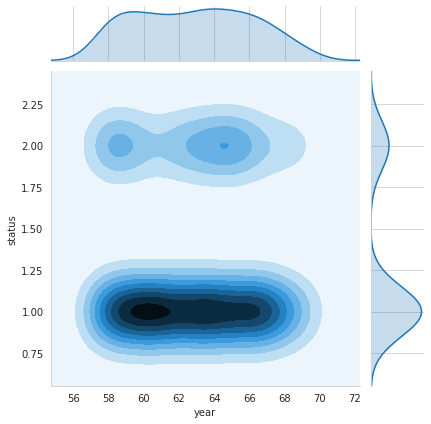

In [62]:
sns.jointplot(x="year", y= "status", data=data_df, kind="kde")
plt.show()


Observation: A huge Concentration of people who were operated between 1959 - 1962 were seen to be alive for more than 5 years

### Conclusions:
- A lot of observations were noticed between nodes and labels. Higher concentration of people who lived > 5 years had less than 5 nodes
- If the distribution could be more balanced, i.e. equal ratio of output classes it would give much accurate results
- Almost 75th quartile of the data (> 5 years) has less tha 3-4 nodes.
- Years operated shows that a greater concentration of people who died within 5 years were operated before 1963, but this could be even due to imbalnce of data with just 27 percent of the data having < 5 years data points 